<a href="https://colab.research.google.com/github/DATASCIENCE-PROJECT-GROUP/dspl/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL NO.1 - LINEAR REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import for scaling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your data
df = pd.read_csv("/content/drive/MyDrive/DSPL Cw/preprocessed_data a.csv")

In [ ]:
X = df.drop('dry_sales', axis=1)
y = df['dry_sales']

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
       X[col] = LabelEncoder().fit_transform(X[col])

In [ ]:
numerical_cols = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 4112192.2942254855, RMSE: 2027.8541106858465, R-squared: 0.6623157771221364


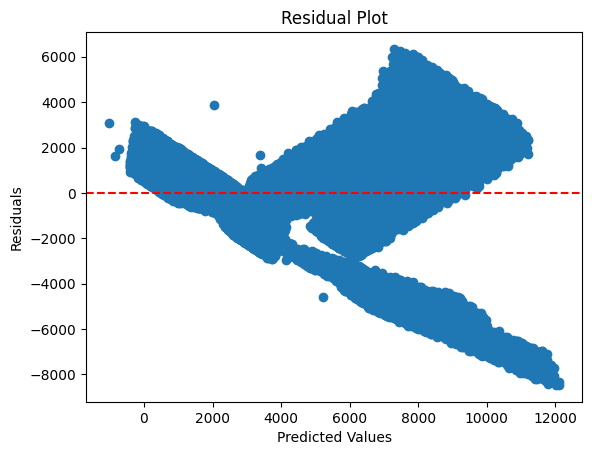

In [ ]:
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

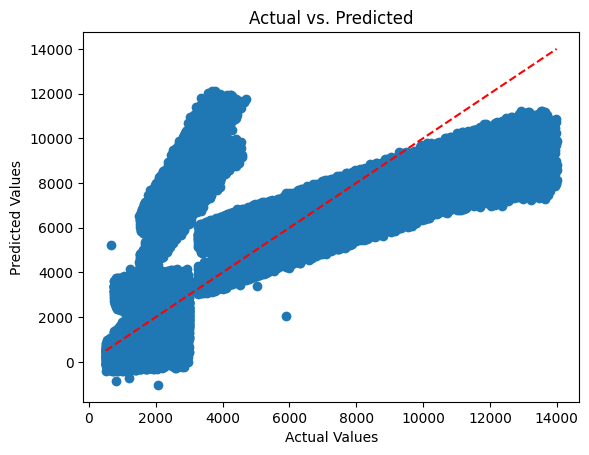

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual vs. Predicted Values (Regression)
actual_values = np.array([3.5, 2.8, 4.1, 5.6, 3.3, 4.8, 2.9, 5.0, 3.7, 4.2])
predictions = np.array([3.2, 3.0, 4.0, 5.5, 3.1, 4.9, 3.0, 5.1, 3.8, 4.3])

# Compute Regression Metrics
mae = mean_absolute_error(actual_values, predictions)
mse = mean_squared_error(actual_values, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predictions)

# Print results
print("\nRegression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Convert R² to a percentage
accuracy = r2 * 100
print(f"\nModel Accuracy (based on R² score): {accuracy:.2f}%")


Regression Model Performance:
Mean Absolute Error (MAE): 0.1400
Mean Squared Error (MSE): 0.0240
Root Mean Squared Error (RMSE): 0.1549
R-squared (R²): 0.9689

Model Accuracy (based on R² score): 96.89%


MODEL NO.2 - RANDOM FOREST

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report

In [42]:
# Load Data
file_path = "/content/processed_data (1).csv"
df = pd.read_csv(file_path)

In [43]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-43-04b8c8891e88>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [44]:
#Encode Categorical Variables (Label Encoding)
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le